# Neiss Datasets

In [239]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [240]:
import seaborn as sns
import matplotlib.pyplot as plt

In [241]:
df_list = []
for year in range(2014, 2024):
    path = f'./data/neiss{year}.tsv'
    print(path, '...', sep='')
    try:
        df_list.append(pd.read_csv(path, sep='\t'))
    except UnicodeDecodeError:
        print('Exception Caught')
        print(path, '...', sep='')
        print(len(pd.read_csv(path, sep='\t', encoding='ISO-8859-1')))
        df_list.append(pd.read_csv(path, sep='\t', encoding='ISO-8859-1'))
df = pd.concat(df_list, axis=0, ignore_index=True)

./data/neiss2014.tsv...
./data/neiss2015.tsv...
./data/neiss2016.tsv...
./data/neiss2017.tsv...
Exception Caught
./data/neiss2017.tsv...


/var/folders/sz/hbk1460n5wdbf8wpmtyd24sc0000gn/T/ipykernel_86085/927198845.py:10: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  print(len(pd.read_csv(path, sep='\t', encoding='ISO-8859-1')))


386907


/var/folders/sz/hbk1460n5wdbf8wpmtyd24sc0000gn/T/ipykernel_86085/927198845.py:11: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_list.append(pd.read_csv(path, sep='\t', encoding='ISO-8859-1'))


./data/neiss2018.tsv...


/var/folders/sz/hbk1460n5wdbf8wpmtyd24sc0000gn/T/ipykernel_86085/927198845.py:6: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_list.append(pd.read_csv(path, sep='\t'))


./data/neiss2019.tsv...


/var/folders/sz/hbk1460n5wdbf8wpmtyd24sc0000gn/T/ipykernel_86085/927198845.py:6: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_list.append(pd.read_csv(path, sep='\t'))


./data/neiss2020.tsv...
./data/neiss2021.tsv...


/var/folders/sz/hbk1460n5wdbf8wpmtyd24sc0000gn/T/ipykernel_86085/927198845.py:6: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_list.append(pd.read_csv(path, sep='\t'))


./data/neiss2022.tsv...
./data/neiss2023.tsv...


/var/folders/sz/hbk1460n5wdbf8wpmtyd24sc0000gn/T/ipykernel_86085/927198845.py:6: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_list.append(pd.read_csv(path, sep='\t'))


In [242]:
# Drop records with missing Narrative_1 data
df.drop(df[df['Narrative_1'].isnull()].index, axis=0, inplace=True)

In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3520522 entries, 0 to 3520529
Data columns (total 25 columns):
 #   Column             Dtype  
---  ------             -----  
 0   CPSC_Case_Number   object 
 1   Treatment_Date     object 
 2   Age                int64  
 3   Sex                float64
 4   Race               float64
 5   Other_Race         object 
 6   Hispanic           float64
 7   Body_Part          float64
 8   Diagnosis          float64
 9   Other_Diagnosis    object 
 10  Body_Part_2        float64
 11  Diagnosis_2        float64
 12  Other_Diagnosis_2  object 
 13  Disposition        float64
 14  Location           float64
 15  Fire_Involvement   float64
 16  Product_1          float64
 17  Product_2          float64
 18  Product_3          float64
 19  Alcohol            float64
 20  Drug               float64
 21  Narrative_1        object 
 22  Stratum            object 
 23  PSU                float64
 24  Weight             float64
dtypes: float64(17), int64(1

In [244]:
# def grep_count(pattern):
#     return len(df[df['Narrative_1'].str.contains(pattern, na=False, case=False)])

# a = grep_count('pedestrian')
# b = grep_count('pedes')
# c = grep_count('pedest')
# d = grep_count('pedestrain')
# e = grep_count('struck by')
# f = grep_count('hit by')

# print(f"pedestrian: {a}, pedes: {b}, pedest: {c}, pedestrain: {d}, struck by: {e}, hit by: {f}")

In [245]:
# Only grabbing sample where the narrative contains pedestr or pedst
peds = list(df[df['Narrative_1'].str.contains('pedestr|pedst', na=False, case=False)]['Narrative_1'])

In [246]:
# There are 1,494 such samples
len(peds)

1494

In [247]:
# 237 human labeled samples to be used for fine-tuning the model
# These were randomly sampled from the peds dataset so as to help the model identify tougher to classify samples
labeled_sample = pd.read_csv('ped_accident_labels.csv', index_col='index')

In [248]:
# Our data are pretty equally distributed with more exmples of Pedestrian accounts (which account for far fewer samples in the overall dataset)
labeled_sample['Pedestrian Label'].value_counts()

Pedestrian Label
1    128
0    109
Name: count, dtype: int64

In [249]:
labeled_sample.head()

,Narrative_1,Pedestrian Label
index,,
0,16YOM PRESENTS AFTER BEING PEDESTRIAN STRUCK W...,0
1,55 YOM DX NECK AND BACK PAIN - S/P PT PEDESTRI...,0
2,23YOM WITH ELBOW PAIN AFTER RIDING MOPED TO WO...,0
3,50YOM W/THORACIC & LUMBAR BACK STRAIN S/P PEDE...,1
4,^66YOM PEDESTRIAN WHO JUMPED TO GET OUT OF WAY...,0


In [250]:
# Merging the labeled samples with the original dataframe so that if we need to refer to any additional information (such as product code) we can
labeled_sample = labeled_sample.merge(df, on='Narrative_1', how='left')

In [251]:
labeled_sample.head()

,Narrative_1,Pedestrian Label,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Hispanic,Body_Part,Diagnosis,Other_Diagnosis,Body_Part_2,Diagnosis_2,Other_Diagnosis_2,Disposition,Location,Fire_Involvement,Product_1,Product_2,Product_3,Alcohol,Drug,Stratum,PSU,Weight
0,16YOM PRESENTS AFTER BEING PEDESTRIAN STRUCK W...,0,201227717,10/06/2020,16,1.0,1.0,NaN,2.0,87.0,71.0,NS,NaN,NaN,NaN,1.0,4.0,0.0,5040.0,0.0,0.0,0.0,0.0,V,57.0,15.9992
1,55 YOM DX NECK AND BACK PAIN - S/P PT PEDESTRI...,0,160206064,01/04/2016,55,1.0,2.0,NaN,NaN,89.0,71.0,NECK/BACK PAIN,NaN,NaN,NaN,1.0,4.0,0.0,1329.0,0.0,0.0,NaN,NaN,V,57.0,16.1154
2,23YOM WITH ELBOW PAIN AFTER RIDING MOPED TO WO...,0,231242909.0,12/13/2023,23,1.0,2.0,NaN,2.0,32.0,57.0,NaN,NaN,NaN,NaN,1.0,4.0,0.0,3215.0,0.0,0.0,0.0,0.0,L,51.0,55.4417
3,50YOM W/THORACIC & LUMBAR BACK STRAIN S/P PEDE...,1,160333168,02/05/2016,50,1.0,0.0,NaN,NaN,31.0,64.0,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1684.0,0.0,0.0,NaN,NaN,V,41.0,15.3480
4,^66YOM PEDESTRIAN WHO JUMPED TO GET OUT OF WAY...,0,151107022,09/05/2015,66,1.0,0.0,NaN,NaN,37.0,71.0,PAIN,NaN,NaN,NaN,1.0,4.0,0.0,1871.0,0.0,0.0,NaN,NaN,V,41.0,15.7762


In [252]:
from transformers import BertTokenizer
from datasets import Dataset

# Fine Tuning Distil-BERT

## Convert dataset to huggingface Dataset object

**Hugging Face Dataset Objects:** A special data structure that
- Is designed for efficient preprocessing and tokenization

- Works seamlessly with Hugging Face models and the Trainer API

- Supports powerful methods like .map() (for batching transformations)

- Automatically handles formatting for training (like batching and shuffling)


We then split the data into an 80/20 train test split

In [253]:
from datasets import Dataset, ClassLabel, Features, Value

In [256]:
labeled_sample['Pedestrian Label'].dtype

dtype('int64')

In [269]:
# Select and rename the relevant columns to 'text' and 'labels' for compatibility with Hugging Face models
narrative_and_label = labeled_sample[['Narrative_1', 'Pedestrian Label']].rename(columns={'Narrative_1': 'text', 'Pedestrian Label': 'labels'})

# Define the data schema, explicitly marking 'text' as a string and 'labels' as classification targets
features = Features({
    'text': Value('string'), 
    'labels': ClassLabel(names=["Not Pedestrian", "Pedestrian"]) # (allows for stratification)
})

# Convert the labeled DataFrame into a Hugging Face Dataset with defined schema
dataset = Dataset.from_pandas(narrative_and_label, features=features)

# Split the dataset into train and test sets (80/20), stratified by labels for balanced class distribution
dataset = dataset.train_test_split(test_size=0.2, seed=42, stratify_by_column='labels')


In [265]:
narrative_and_label

,text,labels
0,16YOM PRESENTS AFTER BEING PEDESTRIAN STRUCK W...,0
1,55 YOM DX NECK AND BACK PAIN - S/P PT PEDESTRI...,0
2,23YOM WITH ELBOW PAIN AFTER RIDING MOPED TO WO...,0
3,50YOM W/THORACIC & LUMBAR BACK STRAIN S/P PEDE...,1
4,^66YOM PEDESTRIAN WHO JUMPED TO GET OUT OF WAY...,0
...,...,...
232,36YOM PEDESTRIAN COMING OUT OF A BUILDING WHEN...,1
233,33YOM PT STATES AROUND 8PM YESTERDAY WAS RIDIN...,0
234,51YOF DRIVER IN MVA THAT STRUCK A PERSON RIDIN...,0
235,28 YOM HAD BEEN UNHELMETED SKATEBOARDING THROU...,1


# Tokenizing Data

We use the Hugging Face AutoTokenizer to create a DistilBERT-compatible tokenizer that converts each narrative into a format the model can understand (token IDs and attention masks).

We define a tokenize function that:
- truncates samples to a maximum of 128 tokens if too long
- pads samples to 128 tokens when too short

We use .map(batched=True) to efficiently apply it to all samples in the Hugging Face Dataset. The batched=True argument speeds up the process by processing multiple samples at once instead of one at a time.

In [93]:
from transformers import AutoTokenizer

In [94]:
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

In [95]:
def tokenize(sample):
    return tokenizer(sample['text'], truncation=True)

In [96]:
results = dataset.map(tokenize, batched=True)

Map: 100%|██████████| 48/48 [00:00<00:00, 2996.42 examples/s]


In [97]:
# Example of the output of one sample
results['train'][0]

{'text': '11 YOM C/O FACIAL ABRASION AND SHOULDER ABRASION S/P WAS RIDING HIS BIKE IN THE STREET AND WAS HIT BY A CAR. DX: FACIAL ABRASION; SHOULDER ABRASION; AUTOMOBILE VERSUS PEDESTRIAN',
 'labels': 1,
 'input_ids': [101,
  2340,
  10930,
  2213,
  1039,
  1013,
  1051,
  13268,
  11113,
  8180,
  3258,
  1998,
  3244,
  11113,
  8180,
  3258,
  1055,
  1013,
  1052,
  2001,
  5559,
  2010,
  7997,
  1999,
  1996,
  2395,
  1998,
  2001,
  2718,
  2011,
  1037,
  2482,
  1012,
  1040,
  2595,
  1024,
  13268,
  11113,
  8180,
  3258,
  1025,
  3244,
  11113,
  8180,
  3258,
  1025,
  9935,
  6431,
  14662,
  102],
 'attention_mask': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1]}

# Setting up the Classification Model
- We are classifying entire inputs/sentences/sequences therefore we are doing a sequence classification task.
- Import AutoModelForSequenceClassification class which is instantiated from a pretrained model (distilBERT in this case) 
- Set up the mapping for the labels for interpretability as we are training the model

In [98]:
# We import AutoModelForSequenceClassification since we are trying to classify the entire input (sequence) at once
from transformers import AutoModelForSequenceClassification

In [99]:
# Create a mapping for the models predictions to help with interpretability
id2label = {0: "Not Pedestrian", 1: "Pedestrian"}
label2id = {"Not Pedestrian":0, "Pedestrian": 1}

model = AutoModelForSequenceClassification.from_pretrained(
    "distilbert-base-uncased", 
    num_labels=2,
    id2label=id2label,
    label2id=label2id
)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


# Low-Rank Adaptation

- We are using LoRA for fine-tune only a small number of parameters instead of the full model

In [100]:
# peft: Parameter Efficient Fine-Tuning
from peft import LoraConfig, get_peft_model

In [101]:
peft_config = LoraConfig(
    task_type='SEQ_CLS', # Defining the classification type to be Sequence Classification
    r=8, # Lora attention dimension (intrinsic rank of the low-rank matricies)
    lora_alpha=32, # Alpha Parameter for Lora scaling (like the learning rate)
    lora_dropout=0.1, # The dropout probability for Lora layers
    target_modules=['q_lin', 'k_lin', 'v_lin', 'ffn.lin1', 'ffn.lin2'] # We will start by allowing the query, key, and value linear layers to be modified by the model
)

In [102]:
model = get_peft_model(model, peft_config)
model.print_trainable_parameters()

trainable params: 1,181,954 || all params: 68,136,964 || trainable%: 1.7347


In [103]:
# for name, module in model.named_modules():
#     print(name)

#  Configure and Run Training

In [104]:
from transformers import TrainingArguments, Trainer, DataCollatorWithPadding
import evaluate
import numpy as np
import torch

In [105]:
from evaluate import load

# Load evaluation metrics
accuracy = load("accuracy")
precision = load("precision")
recall = load("recall")
f1_score = load("f1")

# Define a metric function for evaluation
def compute_metrics(p):
    pred = np.argmax(p.predictions, axis=1)
    labels = p.label_ids

    return {
        "accuracy": accuracy.compute(predictions=pred, references=labels)['accuracy'],
        "precision": precision.compute(predictions=pred, references=labels, average='binary')['precision'],
        "recall": recall.compute(predictions=pred, references=labels, average='binary')['recall'],
        "f1": f1_score.compute(predictions=pred, references=labels, average='binary')['f1'],
    }

## Untrained Model Performance

In [106]:
import random

In [107]:
random.seed(25)
sample = random.sample(list(labeled_sample['Narrative_1'].values), 5)
sample

['17YOM PRESENTED AT ED C/O OF PEDESTRIAN STRUCK. PT WAS HELMETED AND RIDING A BICYCLE WHEN A CAR HIT HIM HEAD-ON. PT HIT THE WINDSHIELD AGAINST THE FRONT OF HIS BODY AND LEFT SIDE OF HIS FACE.  DENIES ANY LOSS OF CONSCIOUSNESS. CURRENTLY COMPLAINING OF RIGHT-SIDED INGUINAL PAIN.  PT SUSTAINED ABRASIONS TO RIGHT INGUINAL REGION AND RIGHT CHEEK.  DX: PEDESTRIAN INJURED IN TRAFFIC ACCIDENT',
 '21YOF RIDING A SMALL SCOOTER AND STRUCK BY CAR ON L SIDE, PT WAS THEPEDESTRIAN DX:A L HIP AND KNEE CONTU',
 '55 YOF PEDESTRIAN WAS STRUCK BY A CYCLIST TRAVELING 15-20MPH.          DX:  TRAUMATIC ICH, EPIDURAL HEMATOMA, RESP FAILURE, SDH.',
 '50YOM W/THORACIC & LUMBAR BACK STRAIN S/P PEDESTRIAN HIT BY CAR THAT WAS BACKING UP. STATES WAS SITTING IN A CART WHEN HIT.',
 '13 YOM ***, TRIED TO DODGE PEDESTRIAN & FELL C/O ANKLE PAIN DX TRIPLANE ANKLE FRACTURE']

In [108]:
print("Untrained model predictions")
print("----------------------------")

for text in sample:
    # Tokenize text
    inputs = tokenizer.encode(text, return_tensors='pt')
    # compute logits
    logits = model(inputs).logits
    # Convert logits to label
    predictions = torch.argmax(logits)
    
    print(text + ' - ' + id2label[predictions.item()])
    
    

Untrained model predictions
----------------------------
17YOM PRESENTED AT ED C/O OF PEDESTRIAN STRUCK. PT WAS HELMETED AND RIDING A BICYCLE WHEN A CAR HIT HIM HEAD-ON. PT HIT THE WINDSHIELD AGAINST THE FRONT OF HIS BODY AND LEFT SIDE OF HIS FACE.  DENIES ANY LOSS OF CONSCIOUSNESS. CURRENTLY COMPLAINING OF RIGHT-SIDED INGUINAL PAIN.  PT SUSTAINED ABRASIONS TO RIGHT INGUINAL REGION AND RIGHT CHEEK.  DX: PEDESTRIAN INJURED IN TRAFFIC ACCIDENT - Not Pedestrian
21YOF RIDING A SMALL SCOOTER AND STRUCK BY CAR ON L SIDE, PT WAS THEPEDESTRIAN DX:A L HIP AND KNEE CONTU - Not Pedestrian
55 YOF PEDESTRIAN WAS STRUCK BY A CYCLIST TRAVELING 15-20MPH.          DX:  TRAUMATIC ICH, EPIDURAL HEMATOMA, RESP FAILURE, SDH. - Not Pedestrian
50YOM W/THORACIC & LUMBAR BACK STRAIN S/P PEDESTRIAN HIT BY CAR THAT WAS BACKING UP. STATES WAS SITTING IN A CART WHEN HIT. - Not Pedestrian
13 YOM ***, TRIED TO DODGE PEDESTRIAN & FELL C/O ANKLE PAIN DX TRIPLANE ANKLE FRACTURE - Not Pedestrian


In [109]:
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [110]:
# Potentially increase the batch size

# Hyperparameters
lr = 0.00006 # Size of optimization step
batch_size = 4 # number of examples processed per optimization step
num_epochs = 10 # number of times the model runs through training data
weight_decay = 0.1

# Defining the training arguments
training_args = TrainingArguments(
    output_dir="./results",
    learning_rate=lr,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=num_epochs,
    weight_decay=weight_decay,
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True, 
    save_total_limit=4,
    report_to='tensorboard',
    do_eval=True, 
    logging_strategy='epoch'
)

In [111]:
results

DatasetDict({
    train: Dataset({
        features: ['text', 'labels', 'input_ids', 'attention_mask'],
        num_rows: 189
    })
    test: Dataset({
        features: ['text', 'labels', 'input_ids', 'attention_mask'],
        num_rows: 48
    })
})

In [112]:
trainer = Trainer(
    model=model, # our peft model
    args=training_args, # hyperparameters
    train_dataset=results['train'], # training data
    eval_dataset=results['test'], # testing data
    tokenizer=tokenizer, # The narratives from the training and testing sets are already pre-tokenized. Passing the tokenizer here is primarily used for decoding predictions
    data_collator=data_collator,
    compute_metrics=compute_metrics # Runs on HuggingFace's EvalPrediction object (see compute metrics notes for how this works)
)

/var/folders/sz/hbk1460n5wdbf8wpmtyd24sc0000gn/T/ipykernel_86085/3979725094.py:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
No label_names provided for model class `PeftModelForSequenceClassification`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.


In [113]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.703200,0.677842,0.541667,0.541667,1.000000,0.702703
2,0.682000,0.666077,0.562500,0.553191,1.000000,0.712329
3,0.654900,0.625907,0.729167,0.666667,1.000000,0.800000
4,0.570200,0.494400,0.791667,0.750000,0.923077,0.827586
5,0.400500,0.469560,0.833333,0.800000,0.923077,0.857143
6,0.412100,0.449816,0.854167,0.851852,0.884615,0.867925
7,0.297600,0.608982,0.833333,0.800000,0.923077,0.857143
8,0.339000,0.627919,0.833333,0.800000,0.923077,0.857143
9,0.272900,0.611603,0.833333,0.821429,0.884615,0.851852
10,0.216200,0.662717,0.833333,0.800000,0.923077,0.857143


TrainOutput(global_step=480, training_loss=0.45486276149749755, metrics={'train_runtime': 130.5719, 'train_samples_per_second': 14.475, 'train_steps_per_second': 3.676, 'total_flos': 35458407838128.0, 'train_loss': 0.45486276149749755, 'epoch': 10.0})

In [114]:
model.to('mps')

print("Trained model predictions")
print("----------------------------")

for text in sample:
    # Tokenize text
    inputs = tokenizer.encode(text, return_tensors='pt').to('mps')
    # compute logits
    logits = model(inputs).logits
    # Convert logits to label
    predictions = torch.argmax(logits)
    
    print(text + ' - ' + id2label[predictions.item()])

Trained model predictions
----------------------------
17YOM PRESENTED AT ED C/O OF PEDESTRIAN STRUCK. PT WAS HELMETED AND RIDING A BICYCLE WHEN A CAR HIT HIM HEAD-ON. PT HIT THE WINDSHIELD AGAINST THE FRONT OF HIS BODY AND LEFT SIDE OF HIS FACE.  DENIES ANY LOSS OF CONSCIOUSNESS. CURRENTLY COMPLAINING OF RIGHT-SIDED INGUINAL PAIN.  PT SUSTAINED ABRASIONS TO RIGHT INGUINAL REGION AND RIGHT CHEEK.  DX: PEDESTRIAN INJURED IN TRAFFIC ACCIDENT - Pedestrian
21YOF RIDING A SMALL SCOOTER AND STRUCK BY CAR ON L SIDE, PT WAS THEPEDESTRIAN DX:A L HIP AND KNEE CONTU - Not Pedestrian
55 YOF PEDESTRIAN WAS STRUCK BY A CYCLIST TRAVELING 15-20MPH.          DX:  TRAUMATIC ICH, EPIDURAL HEMATOMA, RESP FAILURE, SDH. - Not Pedestrian
50YOM W/THORACIC & LUMBAR BACK STRAIN S/P PEDESTRIAN HIT BY CAR THAT WAS BACKING UP. STATES WAS SITTING IN A CART WHEN HIT. - Pedestrian
13 YOM ***, TRIED TO DODGE PEDESTRIAN & FELL C/O ANKLE PAIN DX TRIPLANE ANKLE FRACTURE - Not Pedestrian


In [115]:
# Merging the pedestrian samples with all of our data so that we can refer to additional points of data if need be
peds = pd.DataFrame(peds, columns=['Narrative_1']).merge(df, on='Narrative_1', how='left')

In [116]:
peds.head(3)

,Narrative_1,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Hispanic,Body_Part,Diagnosis,Other_Diagnosis,Body_Part_2,Diagnosis_2,Other_Diagnosis_2,Disposition,Location,Fire_Involvement,Product_1,Product_2,Product_3,Alcohol,Drug,Stratum,PSU,Weight
0,18 YOM BIBA AFTER BEING STRUCK BY A DUMP TRUCK...,140144086,01/16/2014,18,1.0,3.0,HISPANIC,NaN,76.0,57.0,NaN,NaN,NaN,NaN,4.0,4.0,0.0,1333.0,0.0,0.0,NaN,NaN,V,77.0,14.3089
1,"36 YOM BIBA, WAS STRUCK BY AN SUV WHILE RIDING...",140144109,01/16/2014,36,1.0,1.0,NaN,NaN,34.0,57.0,NaN,NaN,NaN,NaN,4.0,4.0,0.0,5040.0,0.0,0.0,NaN,NaN,V,77.0,14.3089
2,61 YOM REPORTS BEING PEDESTRIAN STRUCK BY MV A...,140227568,02/11/2014,61,1.0,1.0,NaN,NaN,34.0,64.0,NaN,NaN,NaN,NaN,1.0,4.0,0.0,5040.0,0.0,0.0,NaN,NaN,V,77.0,14.3089


In [117]:
# Pulling the data that the model has not seen before
unseen_data = peds[~peds['Narrative_1'].isin(labeled_sample['Narrative_1'])]

In [118]:
model.to('mps')

print('Classifying narratives containing pedestrian')
print('--------------------------------------------')

classifications = []
for narrative in unseen_data['Narrative_1']:
    # Tokenize text
    inputs = tokenizer.encode(narrative, return_tensors='pt').to('mps')
    # compute logits
    logits = model(inputs).logits
    # Convert logits to label
    predictions = torch.argmax(logits)
    
    classifications.append(id2label[predictions.item()])

Classifying narratives containing pedestrian
--------------------------------------------


In [119]:
unseen_data['LLM Classification'] = classifications

/var/folders/sz/hbk1460n5wdbf8wpmtyd24sc0000gn/T/ipykernel_86085/73694868.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unseen_data['LLM Classification'] = classifications


In [120]:
# Randomly sampling 100 of the 1257 samples that our model classified
print(len(unseen_data))
unseen_data[['Narrative_1', 'LLM Classification']].sample(100, random_state=42).to_clipboard()

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


1257


In [140]:
performance_df = pd.read_csv('performance_df.csv', index_col='index')

In [141]:
performance_df['LLM Classification'] = performance_df['LLM Classification'].map(label2id)

In [142]:
performance_df

,Narrative_1,LLM Classification,Human Label
index,,,
522,"6YOM WHO WAS RIDING HIS BIKE AND LOST CONTROL,...",1,1
116,27 YOM W/HELMET SWERVED BIKE TO AVOID PEDESTRI...,0,0
56,49 YOM DX BACK CONTUSION - S/P BICYCLIST STRUC...,0,0
72,"18YOM W/OPEN FXS OF TIBIA & FIBULA,ABRAS HIP &...",1,1
1273,18YOF BIBEMS AFTER STRUCK BY CAR AND PROPELLED...,1,1
...,...,...,...
182,"24YOF W/BILAT PUL CONTS,KNEE AVULSION & FACIAL...",1,1
359,68yom reports being pedestrian struck when he ...,1,1
30,75YOF TRYING TO GET A SPOON FROM THE BACK OF T...,0,0


In [143]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [144]:
print(classification_report(performance_df['Human Label'], performance_df['LLM Classification'], digits=3))

              precision    recall  f1-score   support

           0      0.761     0.795     0.778        44
           1      0.833     0.804     0.818        56

    accuracy                          0.800       100
   macro avg      0.797     0.800     0.798       100
weighted avg      0.801     0.800     0.800       100



In [127]:
import matplotlib.pyplot as plt

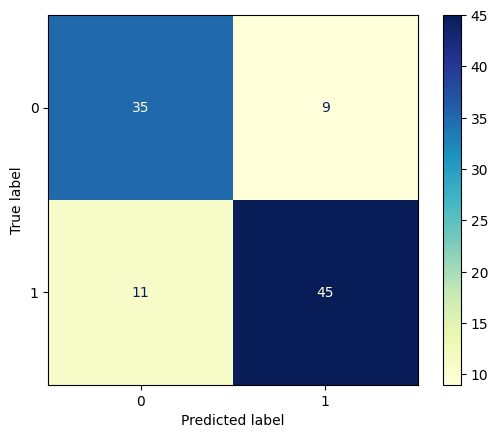

In [145]:
cm = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(performance_df['Human Label'], performance_df['LLM Classification']))
cm.plot(cmap='YlGnBu')

In [146]:
performance_df[(performance_df['LLM Classification']==1) & (performance_df['Human Label']==0)]['Narrative_1'].values

array(['24YOM PRESENTED TO ED C/O PEDESTRAIN STRUCK, PT STATED HE WAS A PASSENGER ON ELECTRIC BIKE AND WAS HIT BY A TURNING MOTOR VEHICLE. REPORTED HE FELL ON L SIDE ON CEMENT. C/O R LEG PAIN AND ABRASIONS TO KNEE, DX; LEG PAIN, KNEE PAIN, MVA',
       '14YOM PRESENTED TO ED C/O PEDESTRAIN STRUCK, PT STATED HE WAS ON THE BACK OF MOPED AND WAS STRUCK BY A CAR. ABRASION TO KNEE DX; FALL',
       '46YOM, C/O HIP PAIN, OPENING GATE WHEN CAR HE WAS PULLING ON TRAILER BEGAN TO ROLL & PINNED HIS LEG BETWEEN GATE & VEHICLE, TAKES ***  DX: RIGHT LOWER EXTREMTIY CRUSH INJURY TRUCK VS PEDESTRIAN, HX AFIB, CHRONIC ANTICOAGULATION THERAPY, NO FRACTURE',
       '26YOM PRESENTS FOR PEDESTRIAN STRUCK, WAS ON MOTORIZED BIKE AND GOT HIT BY CAR, C/O LT LOWER EXTREMITY PAIN DX: ANKLE FRACTURE, LOWER LEG ABRASIONS, ANKLE ABRASIONS',
       '32YOM PEDESTRIAN STRUCK BY A CAR WHILE RIDING AN ELECTRIC SKATEBOARD. + BLOOD IN R EARDX HEMORRHAGE SUBDURAL TRAUMATIC W/O LOC',
       '73YOF WAS HIT IN THE BACK BY A 

## First Model Notes
- The model seemed to misclassify some obvious ones where a biker was struck by a car. It would be good to feed it more of these as examples
- Some edge cases of electric scooters and other electric vehicles (dirt bikes, mopeds etc.) would be good to feed to the model. It was having some diffculty there

# Plan to Strengthen the Model
> The current model was trained on an initial set of 237 human-labeled samples. It achieved an overall accuracy of 80.0%, with a precision of 83.3% on samples labeled as pedestrian injuries. The following steps will be implemented to further strengthen and refine the model.

1. Combine labeled data: Merge the original 237 labeled samples with the 100 newly labeled ones, resulting in a training/validation set of 337 examples.
1. Create a holdout evaluation set by stratifying 150 samples:
    * 50 containing the word or some variation of the word “pedestrian”
    * 50 containing “struck by” or “hit by” 
    * 50 containing both

    These samples will not be among the 337 samples used for training and will be manually labeled and reserved exclusively for final evaluation.
3. Train the model: Perform a new train/validation split and fine-tune the model accordingly.
4. Generate predictions using softmax probabilities instead of argmax. Then proceed with one of two approaches:
* **4.1. Keep existing model and tune threshold:** 
    * Classify a narrative as a pedestrian injury only if the model assigns a probability ≥ 80% (or another calibrated value). Evaluate this model on the holdout set to measure precision and overall performance.
* **4.2. Add additional data based on softmax probablities:**
    * Auto-label: Add all of the data where the model was ≥ 90% and ≤ 10% sure to expand the dataset.
    * Manual label: Add ~50 borderline predictions (45–55% confidence) to refine the model near the decision boundary.
    * Retrain the model with the expanded dataset and evaluate on the same holdout set.
5. Compare results from steps 4.1 and 4.2 and select the version that delivers the best precision and overall performance as the final model.

## 1. Combine labeled data to make the train/validation set

In [ ]:
# Combining the two, only keeping the narrative and the human label
train_validation = pd.concat(
    [labeled_sample[['Narrative_1', 'Pedestrian Label']].rename(columns={'Pedestrian Label': 'Human Label'}),
     performance_df[['Narrative_1', 'Human Label']]],
    axis=0)

## 2. Create Holdout Set

In [ ]:
# Step 1: Filter narratives that contain relevant keywords related to pedestrian activity or motor vehicle involvement
search_words = [
    "walking", "walk", "jogging", "jog", "running", "run", "on foot", "bystander",
    "standing", "biking", "bike", "roller skating", "roller skates", "skateboarding",
    "skateboard", "scootering", "scooter", "pedestr", "pedst", "struck by", "hit by"
]

filtered_df = df[df['Narrative_1'].str.contains('|'.join(search_words), case=False, na=False)]

# ~470,000 samples contain at least one keyword (~6.25 hours to run locally)
len(filtered_df)

In [ ]:
# Step 2: Filter further by location codes of interest (e.g., street or highway)
filtered_df = filtered_df[filtered_df['Location'].isin([4, 5])]

# ~96,000 samples remain (~76.5 minutes to run locally)
print(len(filtered_df))

96128

In [ ]:
# Step 3: Focus on narratives that explicitly mention "pedestrian", "struck by", or "hit by"
filtered_df = filtered_df[filtered_df['Narrative_1'].str.contains('|'.join(["pedestr", "pedst", "struck by", "hit by"]), case=False, na=False)]

# ~20,000 high-priority samples (~15 minutes to run locally)
print(len(filtered_df))

19489

This subset of ~20,000 samples contains location-relevant narratives with keywords most likely to reflect pedestrian injuries involving motor vehicles. This will serve as the primary dataset for local experimentation. In future iterations, model weights may be exported and applied at scale on larger datasets using cloud resources.

In [ ]:
# Excluding data that out model will be trained on
filtered_df = filtered_df[~filtered_df['Narrative_1'].isin(train_validation['Narrative_1'])]

# There are 19,226 samples that are not in our train/validation set
# NOTE: Some data in our train_validation set are not in our original filtered_df since the location codes outside of 4 and 5 were not excluded initially
len(filtered_df)

19226

In [ ]:
# Mask that contains all of the narratives containing pedestrian
pedestrian_mask = filtered_df['Narrative_1'].str.contains('pedst|pedestr', case=False, na=False)
# Mask containing all of the narratives containing struck by/hit by
struck_hit_mask = filtered_df['Narrative_1'].str.contains('struck by|hit by', case=False, na=False)

# df containing 50 "pedestrian" samples that don't contain "struck/hit" by
group_a = filtered_df[pedestrian_mask & ~struck_hit_mask].sample(50, random_state=42)

# df containing 50 "struck/hit by" samples that dont contain "pedestrian"
group_b = filtered_df[struck_hit_mask & ~pedestrian_mask].sample(50, random_state=42)

# df containing 50 samples where both "pedestrian" and "struck/hit by" are present in the narrative
group_c = filtered_df[struck_hit_mask & pedestrian_mask].sample(50, random_state=42)

# Creating flags to test the models performance among each group
group_a['group'] = 'group_a'
group_b['group'] = 'group_b'
group_c['group'] = 'group_c'

# Holdout set containing all three groups
holdout = pd.concat([group_a, group_b, group_c], axis=0)

In [224]:
holdout.head()

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Hispanic,Body_Part,Diagnosis,Other_Diagnosis,Body_Part_2,Diagnosis_2,Other_Diagnosis_2,Disposition,Location,Fire_Involvement,Product_1,Product_2,Product_3,Alcohol,Drug,Narrative_1,Stratum,PSU,Weight,group
1373638,170957638,09/24/2017,52,2.0,0.0,NaN,NaN,75.0,62.0,NaN,NaN,NaN,NaN,1.0,4.0,0.0,5040.0,0.0,0.0,NaN,NaN,52YF HELM'D BICYCLIST CRASHED INTO PEDESTRIAN&...,V,21.0,16.1828,group_a
2870136,220159454,01/25/2022,24,2.0,4.0,NaN,2.0,37.0,64.0,NaN,NaN,NaN,NaN,1.0,4.0,0.0,5040.0,0.0,0.0,0.0,0.0,"24 YOF IN MVA , PEDESTRIAN STRUCK AND INJ LEG ...",V,38.0,17.2223,group_a
3007698,220705908,06/09/2022,12,1.0,0.0,NaN,0.0,75.0,52.0,NaN,NaN,NaN,NaN,4.0,4.0,0.0,5040.0,0.0,0.0,0.0,0.0,12YOM BROUGHT IN BY AMBULANCE AFTER A PEDESTRI...,C,37.0,6.6676,group_a
703697,151238381,11/18/2015,40,1.0,2.0,NaN,NaN,36.0,57.0,NaN,NaN,NaN,NaN,1.0,4.0,0.0,5040.0,0.0,0.0,NaN,NaN,40 YOM DX DISPLACED FX OF LT TIBIAL SPINE - S/...,V,57.0,16.5650,group_a
849328,160538697,05/12/2016,25,2.0,2.0,NaN,NaN,81.0,71.0,LEG/MOUTH PAIN,NaN,NaN,NaN,1.0,4.0,0.0,5040.0,0.0,0.0,NaN,NaN,25 YOF DX LEG/MOUTH PAIN - S/P PT PEDESTRIAN S...,V,57.0,14.6504,group_a


## 3. Train the model

In [271]:
features = Features({
    'text': Value('string'),
    'labels': ClassLabel(names=["Not Pedestrian", "Pedestrian"])
})

dataset = Dataset.from_pandas(
    df=train_validation.rename(columns={'Narrative_1':'text', 'Human Label': 'labels'}).reset_index(drop=True),
    features=features
)

dataset = dataset.train_test_split(test_size=0.2, seed=42, stratify_by_column='labels')

In [272]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'labels'],
        num_rows: 269
    })
    test: Dataset({
        features: ['text', 'labels'],
        num_rows: 68
    })
})

In [276]:
# Initializing tokenizer
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

# defining the tokenization function
def tokenize(sample):
    return tokenizer(
        sample['text'],
        # padding='max_length',
        truncation=True
    )
    
results = dataset.map(tokenize, batched=True)

Map: 100%|██████████| 68/68 [00:00<00:00, 4493.17 examples/s]


In [278]:
id2label = {0: "Not Pedestrian", 1: "Pedestrian"}
label2id = {"Not Pedestrian":0, "Pedestrian": 1}

model = AutoModelForSequenceClassification.from_pretrained(
    "distilbert-base-uncased",
    num_labels = 2,
    id2label = id2label,
    label2id = label2id
)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
